In [1]:
import pandas as pd
import numpy as np
import analyzer as ana
import plotter as ptr

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.dates as mdates

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{cmbright}')
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [5]:
df = pd.read_csv('../test_data/cgal_2b.csv')

In [6]:
df.head()

,sc-15,sc-20,sc-25,sk-15,sk-20,sk-25,m3-15,m3-20,m3-25
0,1298.547,2737.135,16499.30,8978.031,14251.97,16593.960,20722.62,11703.01,17073.800
1,6798.146,12185.360,12672.19,11221.130,13616.94,6910.673,10373.52,17025.58,15379.370
2,10686.910,1532.901,15832.53,9460.200,17474.90,20934.660,21707.12,17499.83,16991.490
3,2018.864,2357.752,15065.03,9049.072,16042.57,18042.750,21750.27,15657.50,13393.350
4,1551.396,1888.596,16960.67,14132.810,12867.40,23189.560,20820.26,11383.33,7709.297


In [7]:
df = pd.melt(df, var_name='Name-Temperature', value_name='Fluorescence intensity (a.u.)')

In [9]:
df.dropna(inplace=True)

In [10]:
p_vals = ana.calculate_pvalues(df, blabel='Name-Temperature', mlabel='Fluorescence intensity (a.u.)', n=10**5, f=np.mean)

#8 cores detected for this machine.
#Starting 8 processes for bootstrapping...
#Bootstrapping complete.

#P-value matrix:
         sc-15    sc-20    sc-25    sk-15    sk-20    sk-25    m3-15    m3-20  \
sc-15      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
sc-20  0.02319      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
sc-25  0.00001  0.00001      NaN      NaN      NaN      NaN      NaN      NaN   
sk-15  0.00001  0.00001  0.00005      NaN      NaN      NaN      NaN      NaN   
sk-20  0.00001  0.00001  0.13106  0.00001      NaN      NaN      NaN      NaN   
sk-25  0.00001  0.00001  0.00001  0.00001  0.00001      NaN      NaN      NaN   
m3-15  0.00001  0.00001  0.01367  0.00038  0.02084  0.48123      NaN      NaN   
m3-20  0.00001  0.00001  0.46259  0.01270  0.23184  0.00037  0.01882      NaN   
m3-25  0.00001  0.00001  0.50037  0.00008  0.12600  0.00001  0.01377  0.46063   

       m3-25  
sc-15    NaN  
sc-20    NaN  
sc-25    NaN  
sk-15  

In [11]:
q_vals = ana.calculate_qvalues(p_vals)

#Q-value matrix:
          sc-15    sc-20     sc-25     sk-15     sk-20     sk-25     m3-15  \
sc-15       NaN      NaN       NaN       NaN       NaN       NaN       NaN   
sc-20  0.028788      NaN       NaN       NaN       NaN       NaN       NaN   
sc-25  0.000360  0.00036       NaN       NaN       NaN       NaN       NaN   
sk-15  0.000360  0.00036  0.000360       NaN       NaN       NaN       NaN   
sk-20  0.000360  0.00036  0.152199  0.000360       NaN       NaN       NaN   
sk-25  0.000360  0.00036  0.000360  0.000360  0.000360       NaN       NaN   
m3-15  0.000360  0.00036  0.019685  0.000605  0.026794  0.502505       NaN   
m3-20  0.000360  0.00036  0.502505  0.019050  0.260820  0.000605  0.025093   
m3-25  0.000360  0.00036  0.502505  0.000360  0.151200  0.000360  0.019685   

          m3-20  m3-25  
sc-15       NaN    NaN  
sc-20       NaN    NaN  
sc-25       NaN    NaN  
sk-15       NaN    NaN  
sk-20       NaN    NaN  
sk-25       NaN    NaN  
m3-15       NaN    NaN  
m3

#Plotting heatmap


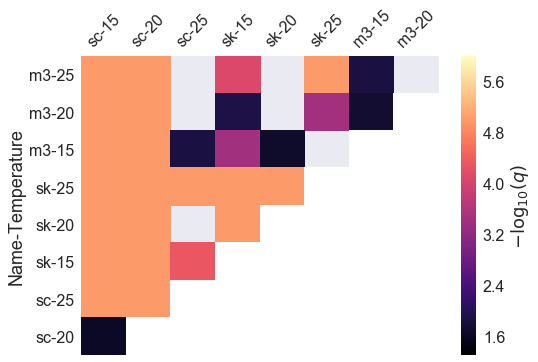

In [12]:
ptr.plot_heatmap(df, p_vals, 'Name-Temperature', 'Fluorescence intensity (a.u.)', 0.05, f=np.mean)